In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import statistics as st

In [2]:
data = pd.read_csv("../dataset/dataset_clean.csv")

In [3]:
data=data.drop(columns='Index')
data.head(10)

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Distance,Time_taken_(min)
0,36.0,4.5,23.351058,85.325731,23.371058,85.345731,2022-03-24 11:25:00,2022-03-24 11:35:00,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,3.018911,25.0
1,37.0,4.7,12.934365,77.616155,13.024365,77.706155,2022-03-25 17:40:00,2022-03-25 17:50:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.973178,40.0
2,25.0,4.9,22.312790,73.170283,22.352790,73.210283,2022-03-19 13:40:00,2022-03-19 13:55:00,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,6.058825,30.0
3,28.0,4.5,17.433809,78.386744,17.563809,78.516744,2022-03-10 23:35:00,2022-03-10 23:45:00,Sandstorms,Low,1,Drinks,motorcycle,0.0,No,Metropolitian,19.975520,11.0
4,22.0,4.5,12.310972,76.659264,12.390972,76.739264,2022-03-10 20:40:00,2022-03-10 20:55:00,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,12.435540,47.0
5,37.0,4.8,19.091458,72.827808,19.101458,72.837808,2022-04-03 10:45:00,2022-04-03 10:50:00,Sunny,Low,1,Meal,scooter,0.0,No,Urban,1.529877,19.0
6,21.0,4.8,23.234249,77.434007,23.244249,77.444007,2022-02-15 09:40:00,2022-02-15 09:45:00,Windy,Low,1,Snack,scooter,1.0,No,Metropolitian,1.510088,15.0
7,35.0,4.2,15.303897,73.914336,15.323897,73.934336,2022-02-13 08:30:00,2022-02-13 08:35:00,Windy,Low,0,Snack,motorcycle,1.0,No,Metropolitian,3.089737,31.0
8,34.0,4.5,22.514688,88.393294,22.564688,88.443294,2022-02-11 18:35:00,2022-02-11 18:40:00,Fog,Medium,2,Drinks,electric_scooter,1.0,No,Urban,7.568330,18.0
9,22.0,5.0,26.911927,75.797282,26.931927,75.817282,2022-04-01 08:20:00,2022-04-01 08:35:00,Fog,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2.979521,20.0


In [4]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Delivery_person_Age : [36. 37. 25. 28. 22. 21. 35. 34. 39. 33. 38. 27. 26. 31. 30. 32. 29. 24.
 23. 20. 15. 50.]
Delivery_person_ratings : [4.5 4.7 4.9 4.8 4.2 5.  4.6 4.4 3.7 3.8 4.  4.3 4.1 3.9 3.6 3.5 2.9 1.
 3.3 2.6 3.2 6.  2.5 3.4 3.1 2.7 2.8 3. ]
Restaurant_latitude : [ 23.351058  12.934365  22.31279   17.433809  12.310972  19.091458
  23.234249  15.303897  22.514688  26.911927  13.064181  22.753659
   0.        19.874449  22.308096  12.284747  13.049645  19.131141
  22.761226  26.892312  27.160934  11.006686  17.431477  13.045479
  26.47775   17.422819  26.492106  21.173343  22.727021  22.725748
  23.357804  23.353783  18.530963  22.552996  12.914264  21.170798
  12.972532  15.496162  11.024839  22.311358  22.311603  26.473698
  26.90519   17.45971   19.055831  22.75004   26.471617  11.022169
  23.371292  12.323194  22.751857  19.003517  17.430448  12.352058
   9.985497  19.221315  13.091809  22.539129  13.086438  18.994049
  12.334022  13.026286  22.307898  10.96185    9.982834

In [5]:
# Examine numerical features in the dataset
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Distance', 'Time_taken_(min)'],
      dtype='object')

In [6]:
# Examine categorical features in the dataset
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [7]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze_dataset_clean.html', open_browser=True)

d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\DataScientist\lib\site-packages\sweetviz\series_analyzer_nume

Report analyze_dataset_clean.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Descriptive statistics (Thống kê mô tả)

Central tendencies (Hướng trung tâm):

In [8]:
#  Get various summary statistics that exclude NaN values
data[numeric_features.columns].describe()

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Multiple_deliveries,Distance,Time_taken_(min)
count,44999.000000,44999.000000,44999.000000,44999.000000,44999.000000,44999.000000,44999.000000,44999.000000,44999.000000,44999.000000
mean,29.690482,4.638579,17.113324,70.511481,17.465041,70.828841,1.004911,0.728994,63.238845,26.295807
std,5.778035,0.330854,7.987761,21.974130,7.340339,21.142918,0.820830,0.576054,790.766321,9.379033
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,1.465067,10.000000
25%,25.000000,4.500000,12.933284,73.170283,12.988453,73.280000,0.000000,0.000000,4.663456,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633934,76.002574,1.000000,1.000000,9.220866,26.000000
75%,34.000000,4.800000,22.728163,78.045359,22.785207,78.107044,2.000000,1.000000,13.762097,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,19692.674606,54.000000


In [9]:
print("Calculate mode value of features:")
for feature in data.columns:
    mode=st.mode(data[feature])
    print(f'{feature}:', mode)

Calculate mode value of features:
Delivery_person_Age: 34.0
Delivery_person_ratings: 4.8
Restaurant_latitude: 0.0
Restaurant_longitude: 0.0
Delivery_location_latitude: 0.13
Delivery_location_longitude: 0.13
Time_order: 2022-03-20 20:15:00
Time_order_picked: 2022-03-29 23:55:00
Weather_conditions: Stormy
Road_traffic_density: Low
Vehicle_condition: 2
Type_of_order: Snack
Type_of_vehicle: motorcycle
Multiple_deliveries: 1.0
Festival: No
City: Metropolitian
Distance: 20.442929762531403
Time_taken_(min): 26.0


In [10]:
print("Calculate median value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].median())

Calculate median value of numerical features:
Delivery_person_Age: 30.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 18.55144
Restaurant_longitude: 75.898497
Delivery_location_latitude: 18.633934
Delivery_location_longitude: 76.002574
Vehicle_condition: 1.0
Multiple_deliveries: 1.0
Distance: 9.220865974717585
Time_taken_(min): 26.0


In [11]:
print("Calculate mean value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].mean())

Calculate mean value of numerical features:
Delivery_person_Age: 29.69048201071135
Delivery_person_ratings: 4.638578635080779
Restaurant_latitude: 17.113324414653658
Restaurant_longitude: 70.51148149769996
Delivery_location_latitude: 17.46504122811618
Delivery_location_longitude: 70.82884128387298
Vehicle_condition: 1.0049112202493389
Multiple_deliveries: 0.7289939776439477
Distance: 63.2388452403907
Time_taken_(min): 26.29580657347941


Dispersion (Độ phân tán):

In [12]:
print("Standard deviation (Độ lệch chuẩn):")
data.std(numeric_only=True)

Standard deviation (Độ lệch chuẩn):


Delivery_person_Age              5.778035
Delivery_person_ratings          0.330854
Restaurant_latitude              7.987761
Restaurant_longitude            21.974130
Delivery_location_latitude       7.340339
Delivery_location_longitude     21.142918
Vehicle_condition                0.820830
Multiple_deliveries              0.576054
Distance                       790.766321
Time_taken_(min)                 9.379033
dtype: float64

In [13]:
print("Variance (Phương sai):")
data.var(numeric_only=True)

Variance (Phương sai):


Delivery_person_Age                33.385685
Delivery_person_ratings             0.109465
Restaurant_latitude                63.804329
Restaurant_longitude              482.862408
Delivery_location_latitude         53.880581
Delivery_location_longitude       447.022977
Vehicle_condition                   0.673761
Multiple_deliveries                 0.331839
Distance                       625311.374970
Time_taken_(min)                   87.966254
dtype: float64

In [14]:
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Distance', 'Time_taken_(min)'],
      dtype='object')

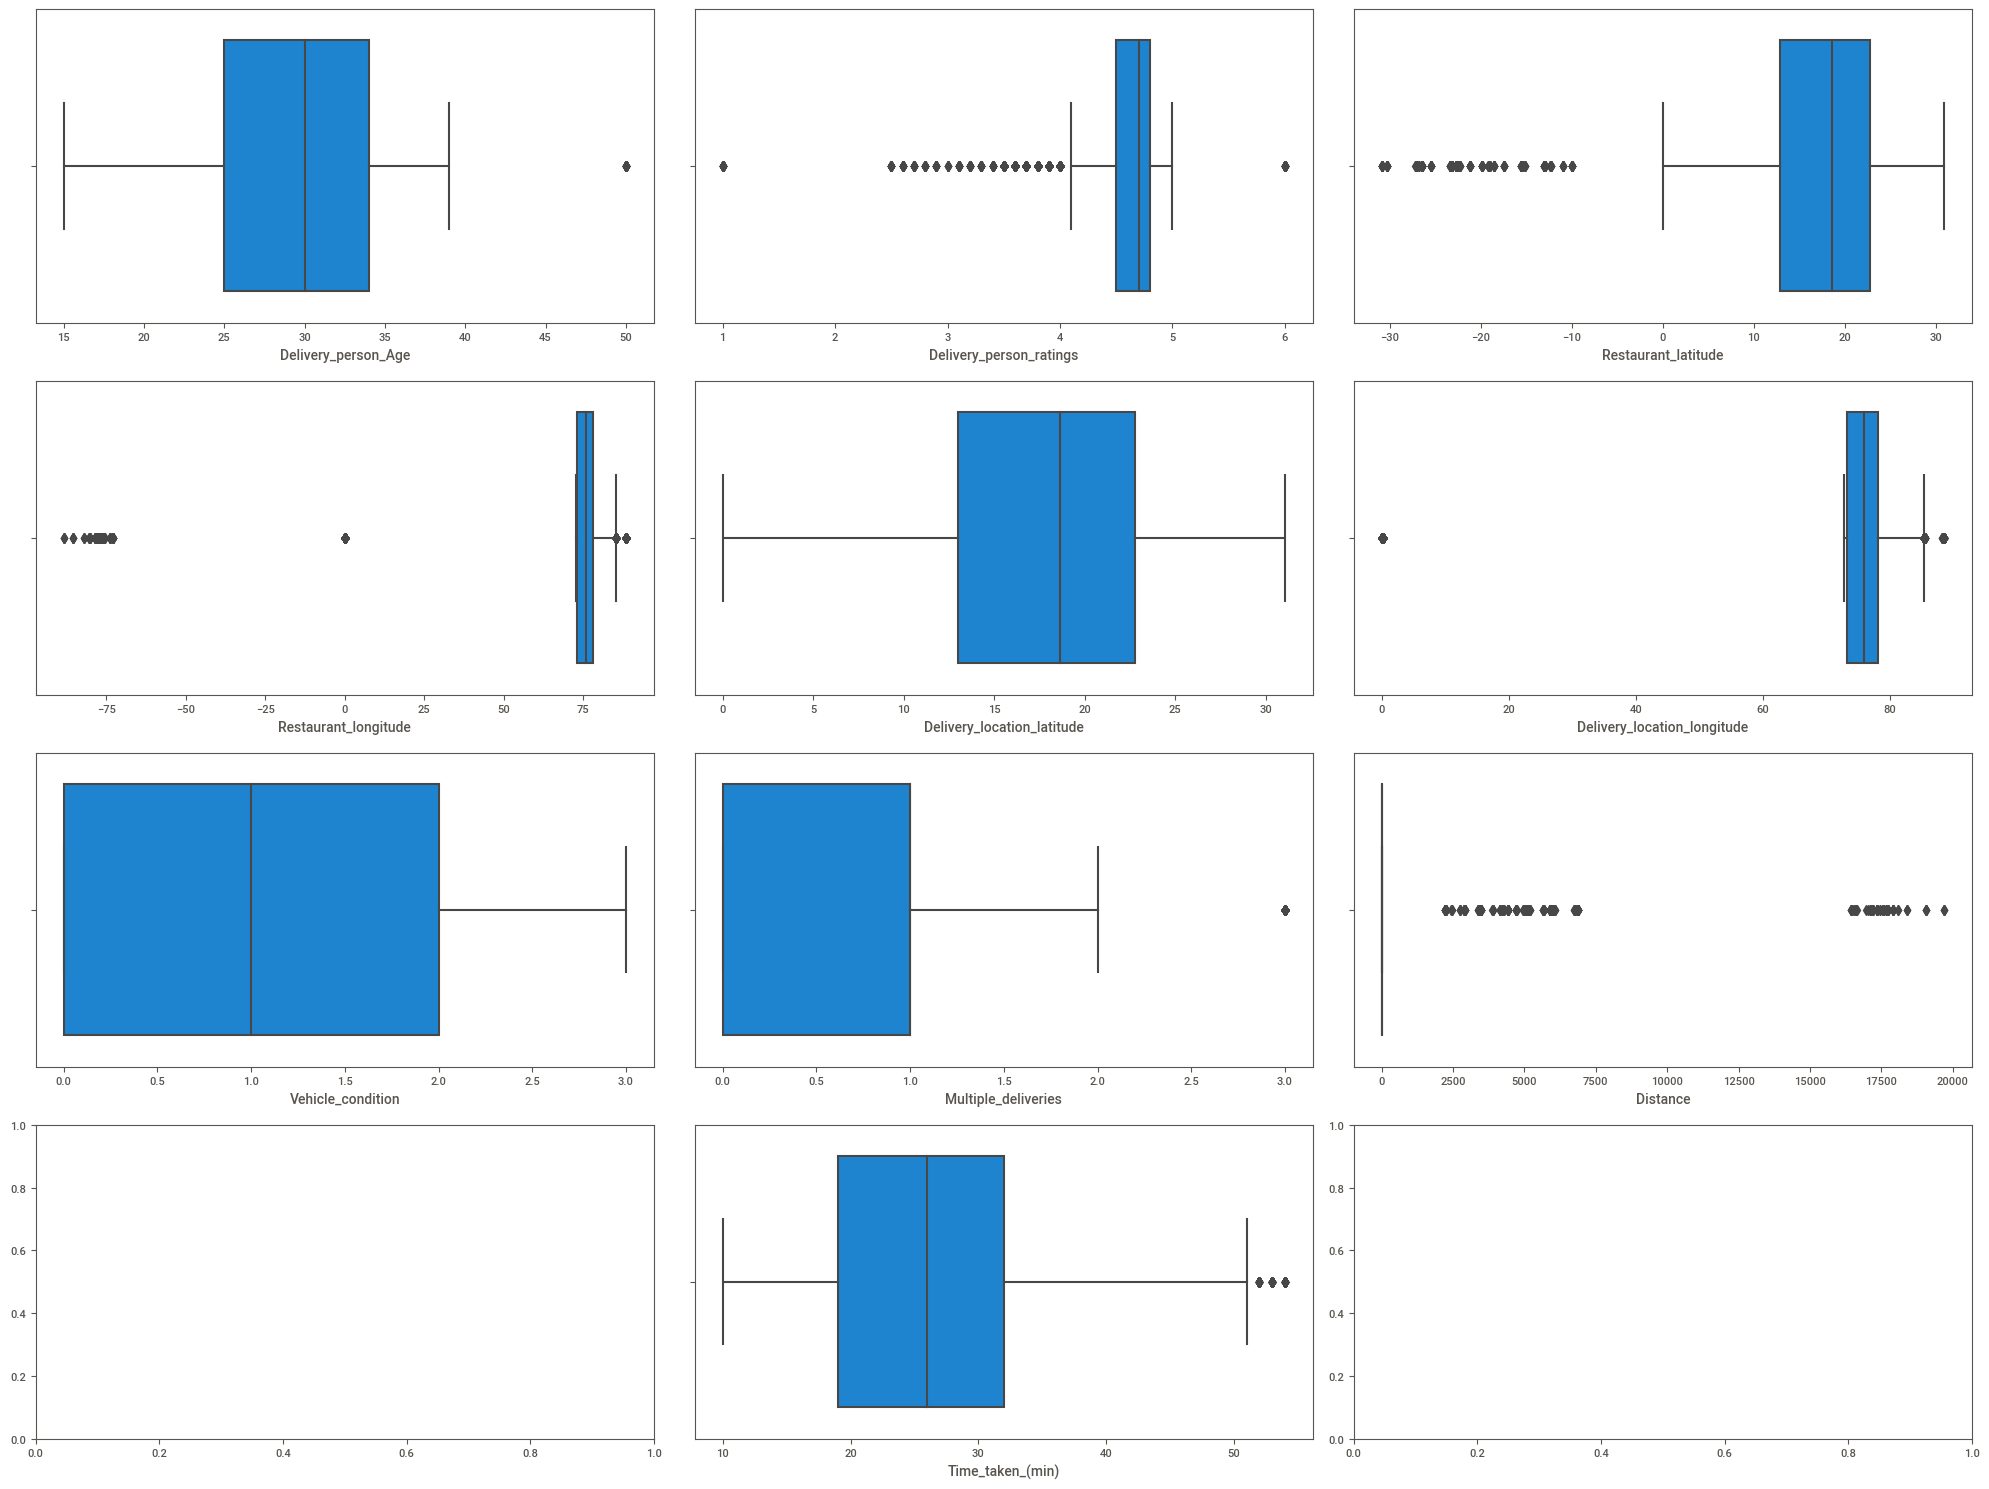

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))

sns.boxplot(x=data["Delivery_person_Age"], ax=axes[0,0])
sns.boxplot(x=data["Delivery_person_ratings"], ax=axes[0,1])
sns.boxplot(x=data["Restaurant_latitude"], ax=axes[0,2])
sns.boxplot(x=data["Restaurant_longitude"], ax=axes[1,0])
sns.boxplot(x=data["Delivery_location_latitude"], ax=axes[1,1])
sns.boxplot(x=data["Delivery_location_longitude"], ax=axes[1,2])
sns.boxplot(x=data["Vehicle_condition"], ax=axes[2,0])
sns.boxplot(x=data["Multiple_deliveries"], ax=axes[2,1])
sns.boxplot(x=data["Distance"], ax=axes[2,2])
sns.boxplot(x=data["Time_taken_(min)"], ax=axes[3,1])
plt.tight_layout()
plt.show()

# Shape of data

In [16]:
data.skew(numeric_only=True)

Delivery_person_Age            -0.034894
Delivery_person_ratings        -2.549441
Restaurant_latitude            -1.254250
Restaurant_longitude           -3.101303
Delivery_location_latitude     -0.701659
Delivery_location_longitude    -2.951788
Vehicle_condition               0.014318
Multiple_deliveries             0.344681
Distance                       19.032912
Time_taken_(min)                0.485867
dtype: float64

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_14340\1134466390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

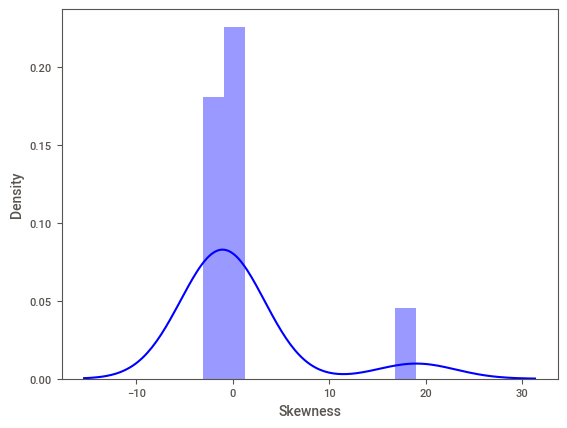

In [17]:
sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')

In [18]:
data.kurt(numeric_only=True)

Delivery_person_Age             -1.060778
Delivery_person_ratings         16.122256
Restaurant_latitude              3.278753
Restaurant_longitude             8.932547
Delivery_location_latitude       0.262402
Delivery_location_longitude      7.075262
Vehicle_condition               -1.459311
Multiple_deliveries              0.809766
Distance                       400.618526
Time_taken_(min)                -0.310425
dtype: float64

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_14340\2935931933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


<AxesSubplot:xlabel='Kurtosis', ylabel='Density'>

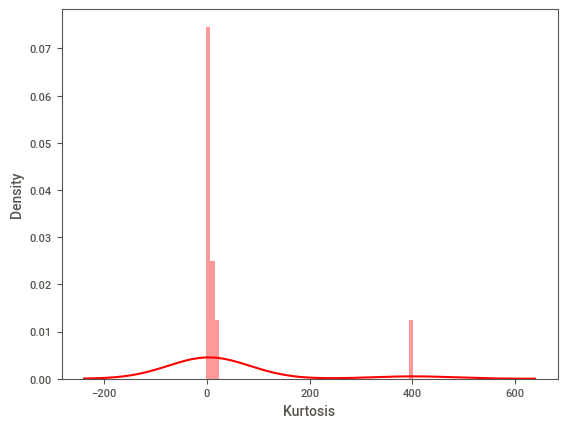

In [19]:
sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)

# Correlation

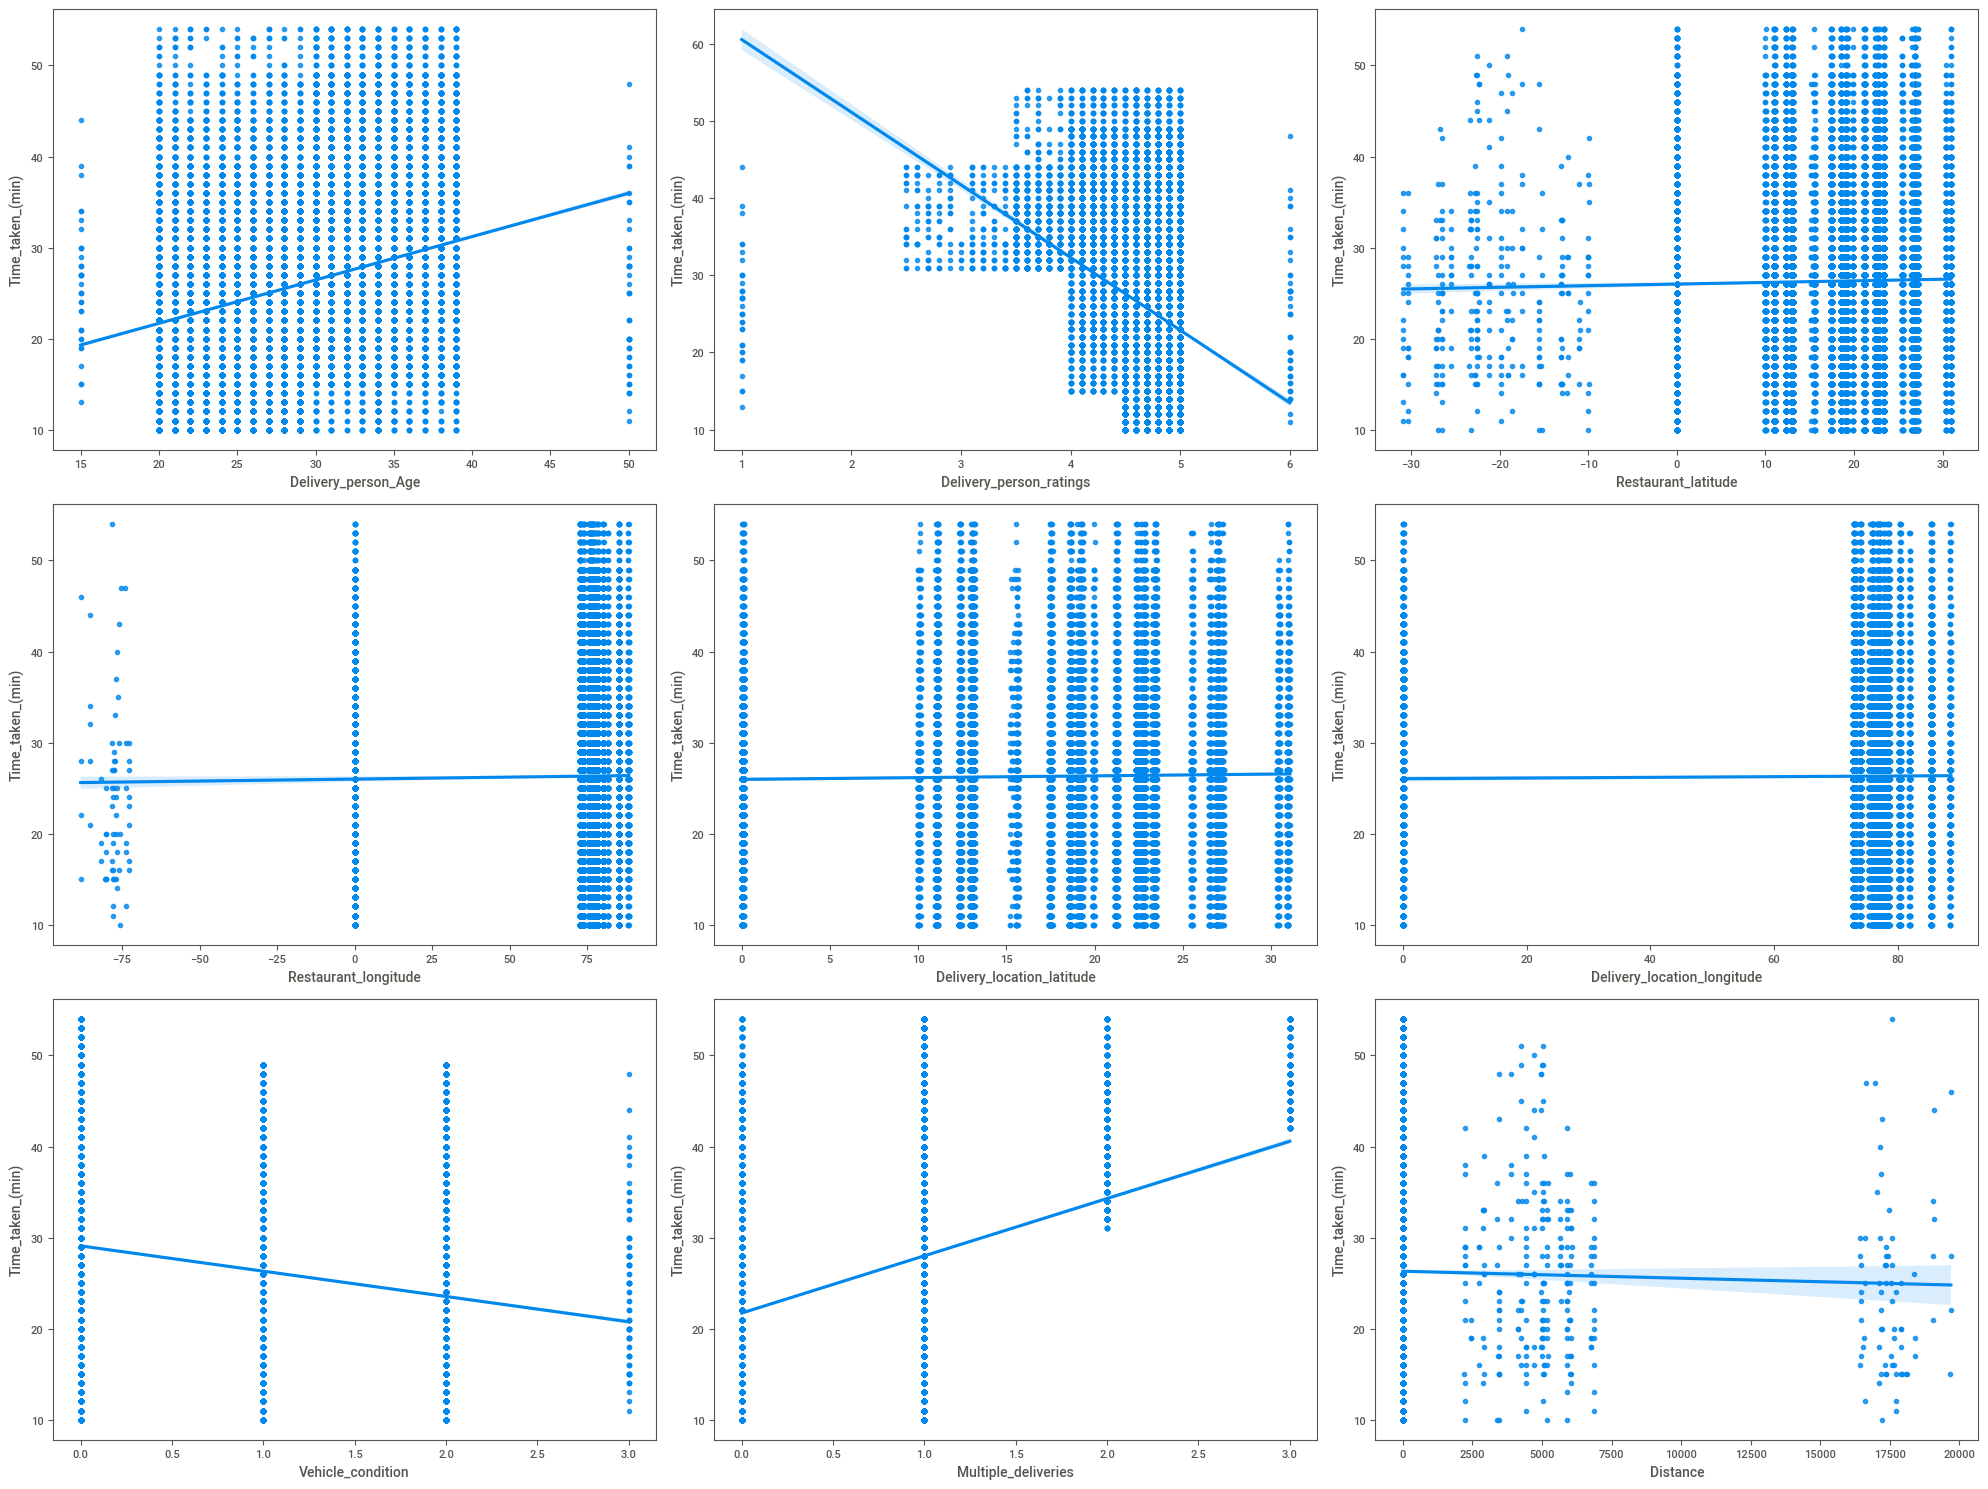

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.regplot(x=data["Delivery_person_Age"], y=data["Time_taken_(min)"], ax=axes[0,0])
sns.regplot(x=data["Delivery_person_ratings"], y=data["Time_taken_(min)"], ax=axes[0,1])
sns.regplot(x=data["Restaurant_latitude"], y=data["Time_taken_(min)"], ax=axes[0,2])
sns.regplot(x=data["Restaurant_longitude"], y=data["Time_taken_(min)"], ax=axes[1,0])
sns.regplot(x=data["Delivery_location_latitude"], y=data["Time_taken_(min)"], ax=axes[1,1])
sns.regplot(x=data["Delivery_location_longitude"], y=data["Time_taken_(min)"], ax=axes[1,2])
sns.regplot(x=data["Vehicle_condition"], y=data["Time_taken_(min)"], ax=axes[2,0])
sns.regplot(x=data["Multiple_deliveries"], y=data["Time_taken_(min)"], ax=axes[2,1])
sns.regplot(x=data["Distance"], y=data["Time_taken_(min)"], ax=axes[2,2])
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Correlation of Features with Time Taken'}>

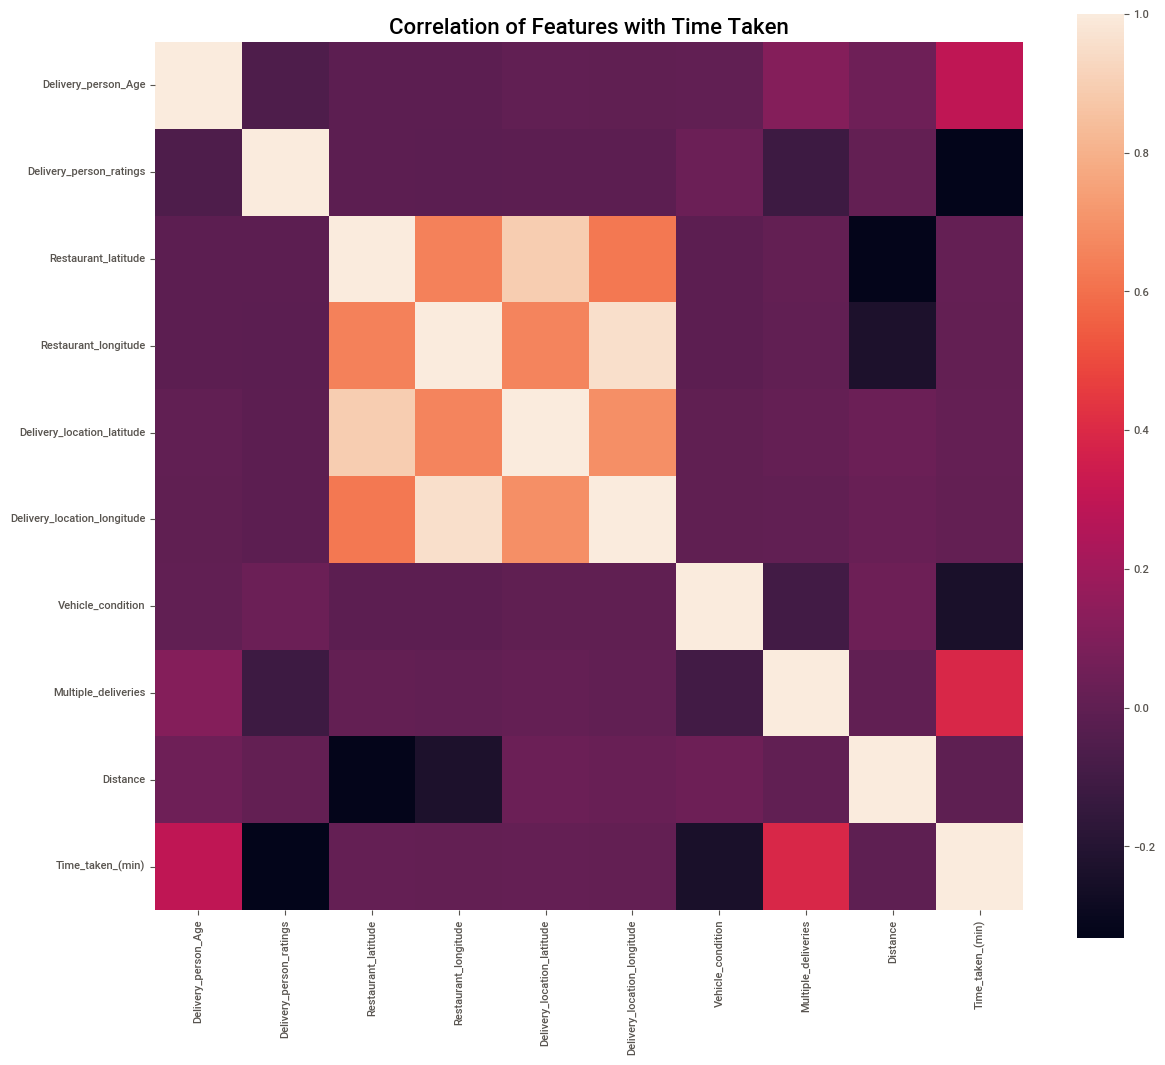

In [21]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features with Time Taken',y=1,size=16)
sns.heatmap(data.corr(numeric_only=True),square = True,  vmax=1)

In [22]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.386256
Delivery_person_Age            0.293418
Delivery_location_latitude     0.015160
Restaurant_latitude            0.015072
Restaurant_longitude           0.010149
Delivery_location_longitude    0.008427
Distance                      -0.006457
Vehicle_condition             -0.243101
Delivery_person_ratings       -0.331879
Name: Time_taken_(min), dtype: float64 



# Group By

In [23]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [24]:
data_gb = data[["Road_traffic_density", "Type_of_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["Road_traffic_density", "Type_of_order"], as_index=False).mean()

data_groupby

,Road_traffic_density,Type_of_order,Time_taken_(min)
0,High,Buffet,27.054243
1,High,Drinks,27.321492
2,High,Meal,27.267764
3,High,Snack,27.132662
4,Jam,Buffet,31.437428
5,Jam,Drinks,30.857883
6,Jam,Meal,31.130423
7,Jam,Snack,31.300944
8,Low,Buffet,21.226440
9,Low,Drinks,21.217733


In [25]:
data_pivot = data_groupby.pivot(index="Road_traffic_density", columns="Type_of_order")
data_pivot

Time_taken_(min)                                 
Type_of_order                  Buffet     Drinks       Meal      Snack
Road_traffic_density                                                  
High                        27.054243  27.321492  27.267764  27.132662
Jam                         31.437428  30.857883  31.130423  31.300944
Low                         21.226440  21.217733  21.459544  21.189196
Medium                      26.517178  26.731005  26.909459  26.655198

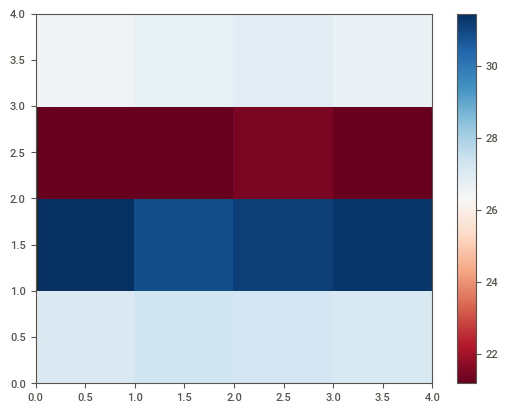

In [26]:
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# Phân tích ANOVA

In [27]:
data_anova = data[["Type_of_order","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_order'])
anova_result = stats.f_oneway(grouped_anova.get_group('Buffet')['Time_taken_(min)'],
                              grouped_anova.get_group('Drinks')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=0.5816275007451814, pvalue=0.44568315577184037)